In [2]:
import pandas as pd

apple = pd.read_csv(r"/content/drive/MyDrive/AAPL.csv", index_col = "Date", parse_dates = True)

In [3]:
apple["daily returns"] = apple["Adj Close"].pct_change()
apple = apple.dropna()

In [4]:
# standard deviation of daily returns

std_dev = apple["daily returns"].std()
std_dev

0.019046635958637197

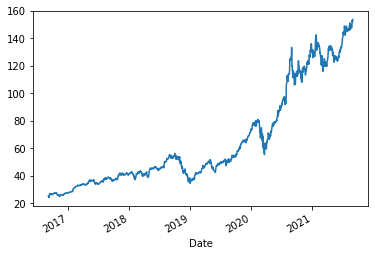

In [5]:
apple["Adj Close"].plot()

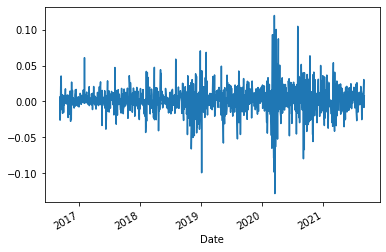

In [6]:
apple["daily returns"].plot()

In [7]:
def calc_sortino_ratio(df, rf_rate = 0, sortino_threshold = 0):

  mean_return = df["daily returns"].mean()
  downside = df[df["daily returns"] < sortino_threshold]["daily returns"]
  std_downside = downside.std()

  sortino_ratio = (mean_return - rf_rate) / std_downside
  sortino_ratio *= 252**0.5

  return sortino_ratio

In [8]:
calc_sortino_ratio(apple)

1.771416631240926